# Python Homework 5

**Release date:** Saturday, February 15 <br>
**Due date:** Friday, February 28, 11:59 p.m. via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename "PythonHW5_YOURPERMNUMBER.ipynb".

__Background:__ The purpose of this python homework is to explore the so-called __Arcsine Laws__ numerically. They describe a number of interesting results by relating path properties of the simple symmetric random walk to the __arcsine distribution__ (see also __Lecture 12__!!).

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, we define the following random variables:
* The total number of periods from $0$ to $2N$ the random walk spends above zero: 

$$C_{2N}= \vert \{ n \in \{ 1,\dots , 2N \} : S_n > 0 \}\vert. $$

* The time of the last visit to $0$ before time $2N$: 

$$L_{2N} = \max \{ 0 \leq n \leq  2N : S_n = 0 \}.$$

* The time when the random walk reaches its maximum value between time $0$ and $2N$: 

$$M_{2N} = \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \}.$$ 

As usual, we start with loading some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine

## Problem 1 (2 Points)

1. Write a function <tt>randomWalk(...)</tt> which simulates one <i>path</i> (or <i>trajectory</i>) of a simple symmetric random walk with 2N time steps (i.e. from 0,1,2,...,2N) starting at $S_0=0$.

Input: 
* <tt>lengthOfRandomWalk = 2N</tt> 

Output:
* <tt>samplePath</tt>: Array of length 2N+1 with the entire path of the random walk on 0,1,2,...,2N


In [2]:
def randomWalk(lengthOfRandomWalk):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE np.random.choice() TO SIMULATE THE INCREMENTS
    S0 = 0
    Xi = [np.random.choice([-1,1]) for i in range(lengthOfRandomWalk)] # makes X1,X2,..,X2N
    Xi.insert(0,0) # inserts 0 at first index, now an array s.t. S0,X1,X2,X3,...,X2N
    Xi = np.array(Xi) #Convert to np array
    S_i = np.cumsum(Xi) # S0, S0+X1, S0+X1+X2,S0+X1+X2+X3,S0+X1+X2+...+XN

    return S_i

In [3]:
## TEST YOUR FUNCTION HERE
y = randomWalk(100)
print(y)

[  0  -1   0   1   0   1   2   3   2   3   2   1   0  -1  -2  -3  -4  -5
  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -15 -16 -17 -18 -19 -20 -21
 -22 -23 -24 -23 -22 -21 -20 -19 -20 -21 -20 -21 -22 -23 -22 -21 -20 -19
 -18 -19 -20 -21 -20 -21 -20 -21 -22 -23 -22 -23 -24 -23 -22 -21 -20 -21
 -22 -23 -22 -21 -22 -23 -22 -23 -24 -23 -22 -23 -24 -23 -22 -23 -24 -23
 -24 -25 -24 -25 -24 -25 -24 -23 -24 -25 -24]


2. Plot the trajectory of the random walk you simulated in 1.)

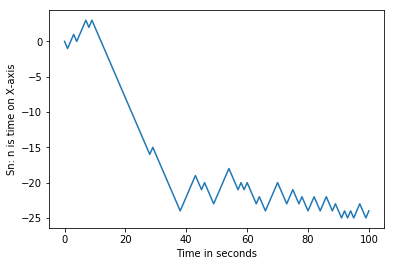

In [4]:
## WRITE YOUR OWN CODE HERE
x = [a for a in range(101)] # time
plt.plot(x,y)
plt.xlabel("Time in seconds")
plt.ylabel("Sn: n is time on X-axis")
plt.show()

## Problem 2 (6 points)

Write __three__ functions which take a path (= realization) of the random walk as an input and then compute a value (= realization) of the random variables $C_{2N}, L_{2N}, M_{2N}$, respectively, as defined above.

__1. Function:__ <tt>timeAboveZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $C_{2N}$

In [5]:
def timeAboveZero(path):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.sum() AND A LOGICAL OPERATION
    result = np.where(path>0,1,0) # convert to array of 1 and 0 where the element is 1 if Sn >0
    if path.ndim == 1: #For 1 D array
        result = np.sum(result) # sum the 1s which gives u number of times Sn>0
    if path.ndim ==2: #For 2 D array
        result = np.sum(result,axis =1)
    return result

In [6]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
timeAboveZero(path)

[0 1 2 1 2 3 4 5 6 5 4 5 6 5 6 7 6 5 6 7 8]


20

__2. Function:__ <tt>TimeOfLastVisitOfZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $L_{2N}$

In [7]:
def TimeOfLastVisitOfZero(path):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.where() AND numpy.amax()
    if path.ndim == 1: #For 1 D array
        lastVisit = np.where(path == 0) # returns the index of all Sn == 0
        lastVisit = np.amax(lastVisit)  # maximum index or latest time where Sn == 0
    elif path.ndim ==2: #For 2 D array
        a = []
        for i in range(10000):
            lastVisit = np.where(path[i]== 0) # returns the index of all Sn == 0
            lastVisit = np.amax(lastVisit)
            a.append(lastVisit)
        a = np.asarray(a)
        lastVisit = a
     
    return lastVisit  

In [8]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
TimeOfLastVisitOfZero(path)

[0 1 2 3 2 3 2 3 4 3 2 1 2 3 2 1 0 1 0 1 0]


20

__3. Function:__ <tt>timeHitMax(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $M_{2N}$

In [9]:
def timeHitMax(randomWalk):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.argmax()
    if randomWalk.ndim ==1: #For 1 D array
        result = np.argmax(randomWalk)  # returns index(n) or time n where Sn is largest
    if randomWalk.ndim == 2: #For 2 D array
        result = np.argmax(randomWalk,axis = 1)
    return result

In [10]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
timeHitMax(path)

[ 0 -1 -2 -1 -2 -1  0 -1 -2 -1  0  1  2  1  2  3  4  3  4  5  6]


20

## Problem 3 (2 Points)

Random Walk theory provides us with the following interesting asymptotic statements (cf. __Lecture 12__):

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{C_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{L_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{M_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

We say that the random variables $C_{2N}/2N, L_{2N}/2N, M_{2N}/2N$ <b>converge in distribution</b> to the Arcsine Distribution.

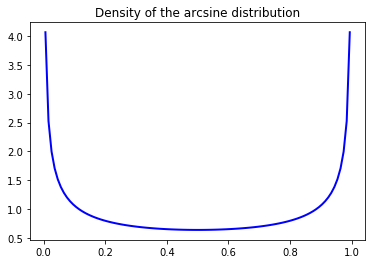

In [11]:
## A PLOT OF THE ARCSINE DENSITY
x = np.linspace(arcsine.ppf(0.05), arcsine.ppf(0.95), 100)
plt.title("Density of the arcsine distribution")
plt.plot(x, arcsine.pdf(x), linewidth=2, color='b')
plt.show()

For $2N = 1000$ sample 10,000 realizations of each of the random variables $C_{2N}/2N, L_{2N}/2N,$ and $M_{2N}/2N$, respectively by using your functions above. Display a normalized histogram for all three simulations, along with the probability density function of the arcsine distribution, to check the above facts numerically! 

In [12]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
N = 500
my_arr = np.array([randomWalk(2*N) for i in range(10000)])
# can't find faster way to create and too slow now

In [13]:

#For C2n/2n
k = timeAboveZero(my_arr)
k = k/(2*N)
print(k)
#For L2n/2n
l = TimeOfLastVisitOfZero(my_arr)
l = l/(2*N)
print(l)
#For M_2n/2n
m = timeHitMax(my_arr)
m = m /(2*N)
print(m)

[1.    0.997 0.001 ... 0.095 0.558 0.015]
[0.    0.004 0.036 ... 0.656 0.582 0.986]
[0.809 0.799 0.001 ... 0.075 0.759 0.997]


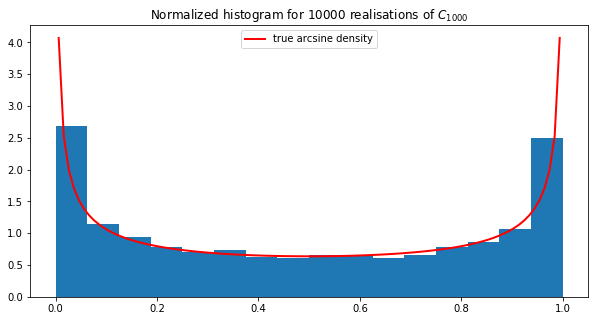

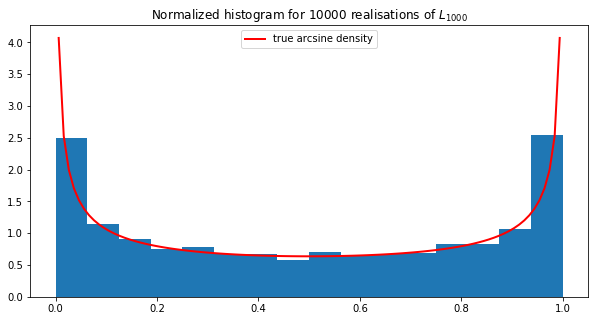

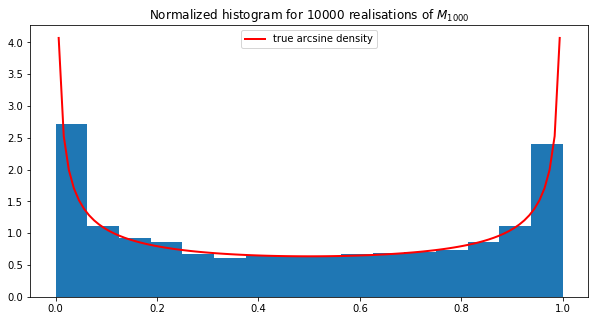

In [14]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY

N = 500
M = 10000


k  # This has to be replaced by the simulated values for C_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $C_{1000}$")
plt.hist(k, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()


l   # This has to be replaced by the corresponding simulated values for L_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $L_{1000}$")
plt.hist(l, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()


m # This has to be replaced by the corresponding simulated values for M_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $M_{1000}$")
plt.hist(m, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

plt.show()